In [18]:
#Dependencies.

import tweepy
import json
import pandas as pd
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Import and Initialize Sentiment Analyzer.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [19]:
#Twitter API keys
consumer_key = "VkbJrK9u2sx7a1nKpRfpIEZ12"
consumer_secret = "gdCKTJqHDZgh4kVnIXWHKbNwl9xy2esuZ0BgGFvqAd9gR8sMty"
access_token = "3236025188-o5LcnEEN3J0NgDBy3NlKEzvb2XVMbpYaEIqE7bw"
access_token_secret = "oApN3W0P5G960Mx2WXdJfPxlTuVnUi7j7v4N9OtWKWzGk"

In [20]:
# Tweepy API Authentication.

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [36]:
# Get tweets from each news organization

target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes")

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []


# Loop through 5 pages of tweets (total 100 tweets)
for user in target_users:

    # Get all tweets from home feed
    public_tweets = api.user_timeline(user, count = 100)

    # Loop through all tweets 
    for tweet in public_tweets:

        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
               
        # Add sentiments for each tweet into a list
        sentiments.append({ "User" : user,
                            "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter,
                           "Tweet Text" : tweet['text']
                          })
        
        # Add to counter 
        counter += 1



In [38]:
#Create DataFrame.

news_sentiments_results = pd.DataFrame.from_dict(sentiments)
news_sentiments_results

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,-0.7351,Wed Jun 27 20:01:05 +0000 2018,0.733,0.267,0.000,A raw and unfiltered insight into the bloodies...,1,@BBC
1,0.4404,Wed Jun 27 19:02:01 +0000 2018,0.637,0.121,0.242,"😂 @Cher's ""criminal"" past is 😳...\n#TheGNShow...",2,@BBC
2,0.0000,Wed Jun 27 18:00:25 +0000 2018,1.000,0.000,0.000,🎧 Can you believe DJ Switch only started DJ-in...,3,@BBC
3,-0.4215,Wed Jun 27 16:04:05 +0000 2018,0.741,0.259,0.000,Something deadly lies beneath the ice in Icela...,4,@BBC
4,0.0000,Wed Jun 27 15:09:27 +0000 2018,1.000,0.000,0.000,🕺 *Knight Fever* \n\nBee Gee Sir Barry Gibb pa...,5,@BBC
5,0.0000,Wed Jun 27 14:42:13 +0000 2018,1.000,0.000,0.000,RT @bbccomedy: Some writing advice from an exp...,6,@BBC
6,0.0000,Wed Jun 27 13:05:07 +0000 2018,1.000,0.000,0.000,French butchers have written to the government...,7,@BBC
7,-0.5106,Wed Jun 27 11:52:00 +0000 2018,0.650,0.350,0.000,☕️ How a simple change is cutting coffee cup w...,8,@BBC
8,0.9403,Wed Jun 27 11:39:52 +0000 2018,0.536,0.000,0.464,"RT @BBCBreakfast: Dear Summer, ☀️\nWe're enjoy...",9,@BBC
9,0.0000,Wed Jun 27 11:03:04 +0000 2018,1.000,0.000,0.000,🦔🧙 Did you know people used to think hedgehogs...,10,@BBC


In [41]:

#Export the DataFrame to as csv.#Export 

news_sentiments_results.to_csv("News_sentiments_twitter.csv", index=False)

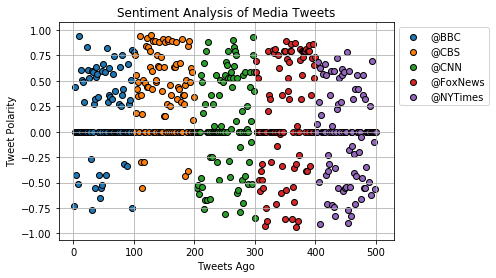

In [58]:
# Create plot
#plot scatterplot using a for loop.
for user in target_users:
    plot_data = news_sentiments_results.loc[news_sentiments_results["User"] == user]
    plt.scatter(plot_data["Tweets Ago"],plot_data["Compound"],label = user, 
               alpha=1.0, edgecolors='black')
    
#Add legend
plt.legend(bbox_to_anchor=(1, 1))

#Add title, x axis label, and y axis label.
plt.title("Sentiment Analysis of Media Tweets")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Set a grid on the plot.
plt.grid()

plt.savefig("Sentiment Analysis of Media Tweets.png")
plt.show()


In [59]:
average_sentiment = news_sentiments_results.groupby("User")["Compound"].mean()
average_sentiment

User
@BBC        0.142683
@CBS        0.355032
@CNN        0.075515
@FoxNews    0.147304
@NYTimes   -0.037478
Name: Compound, dtype: float64

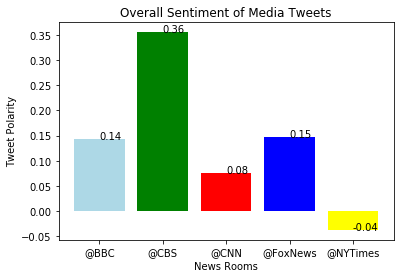

In [76]:
x_axis = np.arange(len(average_sentiment))
xlabels = average_sentiment.index
count = 0
for score in average_sentiment:
    if score < 0: #for neg scores, put label under
        height = score - .01
    else: # for + scores, put label above
        height = score + .01
    plt.text(count, score, str(round(score,2)))
    count = count + 1
plt.bar(x_axis, average_sentiment, tick_label = xlabels, color = ['lightblue', 'green', 'red', 'blue', 'yellow'])
#Set title, x axis label, and y axis label.
plt.title("Overall Sentiment of Media Tweets")
plt.xlabel("News Rooms")
plt.ylabel("Tweet Polarity")
plt.savefig("Bar plot of news tweets.png")
plt.show()